# Citi Bike Ridership Difference between Generations
### [Link to Report on Authorea](https://www.authorea.com/335710/3_J7Jqw42mCOkqLc7yvKUQ)

## Question: Do people of different age groups use Citi Bike the same?

## Hypotheses:

For the sake of this experiment we will set two age groups:

Reference: [Defining generations: Where Millennials end and post-Millennials begin](http://www.pewresearch.org/fact-tank/2018/03/01/defining-generations-where-millennials-end-and-post-millennials-begin/)

**Generation X:** born between 1965 and 1980 (38-53 years old) = $G_1$

**Millennials:** born between 1981 and 1996 (22-37 years old) = $G_2$

### Significance Level: 
We will conduct a two- tailed test at $\alpha=0.05$, to see if the groups have the same proportion or if not then which group has the bigger one.

### Null Hypothesis: 
The proportion of Generation X using Citi Bike is the same as that of Millennials in a given month.

### Alternative Hypothesis: 
The proportion of Generation X using Citi Bike is different from that of Millennials in a given month.



### $H_0$ : $\frac{G_{\mathrm{1}}}{G_{\mathrm{total}}} = \frac{G_{\mathrm{2}}}{G_{\mathrm{total}}}$  OR $P_1$ = $P_2$

### $H_a$ : $\frac{G_{\mathrm{1}}}{G_{\mathrm{total}}} \neq \frac{G_{\mathrm{2}}}{G_{\mathrm{total}}}$ OR $P_1$ ≠ $P_2$



In [ ]:
__author__ = 'Solution by Linda Jaber, CUSP NYU 2018, Principles of Urban Informatics'
from __future__  import print_function

import os 
import numpy as np

import pandas as pd
import matplotlib as plt

%pylab inline

from IPython.display import Image

In [ ]:
PUIdata = os.getenv('PUIDATA')
if PUIdata is None:
    os.environ['PUIDATA']='%s/PUIdata'%os.getenv('HOME')
    PUIdata = os.getenv('PUIDATA')
print('PUIdata: ', PUIdata)

In [ ]:
!curl https://s3.amazonaws.com/tripdata/JC-201803-citibike-tripdata.csv.zip > JC-201803_citibike_tripdata.csv.zip
%mkdir $PUIDATA/citibike
!unzip JC-201803_citibike_tripdata.csv.zip -d $PUIDATA/citibike
!mv JC-201803_citibike_tripdata.csv.zip $PUIDATA/citibike
!ls $PUIDATA/citibike

In [4]:
ct = pd.read_csv(PUIdata + '/citibike/JC-201803-citibike-tripdata.csv')
ct.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,329,2018-03-01 06:37:37.0380,2018-03-01 06:43:06.5520,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29284,Subscriber,1981,1
1,118,2018-03-01 07:37:30.1210,2018-03-01 07:39:28.3910,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29465,Subscriber,1966,1
2,76,2018-03-01 08:26:17.9390,2018-03-01 08:27:34.6770,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29681,Subscriber,1975,1
3,578,2018-03-01 12:10:36.2160,2018-03-01 12:20:14.8690,3183,Exchange Place,40.716247,-74.033459,3185,City Hall,40.717733,-74.043845,31695,Subscriber,1970,1
4,485,2018-03-01 12:21:47.8800,2018-03-01 12:29:53.2990,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,31802,Subscriber,1979,1


In [5]:
ct.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
17104,239,2018-03-30 21:24:17.9440,2018-03-30 21:28:17.7570,3640,Journal Square,40.73367,-74.0625,3194,McGinley Square,40.725340,-74.067622,29616,Subscriber,1990,1
17105,364,2018-03-31 00:45:26.4970,2018-03-31 00:51:31.4750,3640,Journal Square,40.73367,-74.0625,3212,Christ Hospital,40.734786,-74.050444,26228,Subscriber,1986,2
17106,336,2018-03-31 07:38:32.7490,2018-03-31 07:44:09.0950,3640,Journal Square,40.73367,-74.0625,3207,Oakland Ave,40.737604,-74.052478,31954,Subscriber,1971,1
17107,194,2018-03-31 12:08:09.5080,2018-03-31 12:11:23.7180,3640,Journal Square,40.73367,-74.0625,3201,Dey St,40.737711,-74.066921,29491,Subscriber,1963,1
17108,290,2018-03-31 19:54:45.0990,2018-03-31 19:59:35.3650,3640,Journal Square,40.73367,-74.0625,3207,Oakland Ave,40.737604,-74.052478,31681,Subscriber,1989,1


In [6]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17109 entries, 0 to 17108
Data columns (total 15 columns):
tripduration               17109 non-null int64
starttime                  17109 non-null object
stoptime                   17109 non-null object
start station id           17109 non-null int64
start station name         17109 non-null object
start station latitude     17109 non-null float64
start station longitude    17109 non-null float64
end station id             17109 non-null int64
end station name           17109 non-null object
end station latitude       17109 non-null float64
end station longitude      17109 non-null float64
bikeid                     17109 non-null int64
usertype                   17109 non-null object
birth year                 17109 non-null int64
gender                     17109 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
ct.columns, len(ct.columns)

(Index(['tripduration', 'starttime', 'stoptime', 'start station id',
        'start station name', 'start station latitude',
        'start station longitude', 'end station id', 'end station name',
        'end station latitude', 'end station longitude', 'bikeid', 'usertype',
        'birth year', 'gender'],
       dtype='object'), 15)

## Visualizing the distribution of all ages

In [8]:
ct_dob = ct[['birth year']]
ct_dob.head()

,birth year
0,1981
1,1966
2,1975
3,1970
4,1979


In [9]:
ct['birth year'].unique()

array([1981, 1966, 1975, 1970, 1979, 1974, 1984, 1968, 1986, 1983, 1987,
       1941, 1991, 1980, 1976, 1989, 1985, 1956, 1963, 1992, 1988, 1990,
       1958, 1971, 1993, 1977, 1994, 1995, 1969, 1973, 1982, 1959, 1972,
       1962, 1978, 1965, 1960, 1964, 1954, 1961, 1950, 1955, 1967, 1949,
       1957, 1999, 1997, 1952, 1931, 1998, 1953, 1996, 1888, 1951])

In [10]:
ct['birth year'].describe()

count    17109.000000
mean      1979.327956
std         10.461216
min       1888.000000
25%       1973.000000
50%       1981.000000
75%       1987.000000
max       1999.000000
Name: birth year, dtype: float64

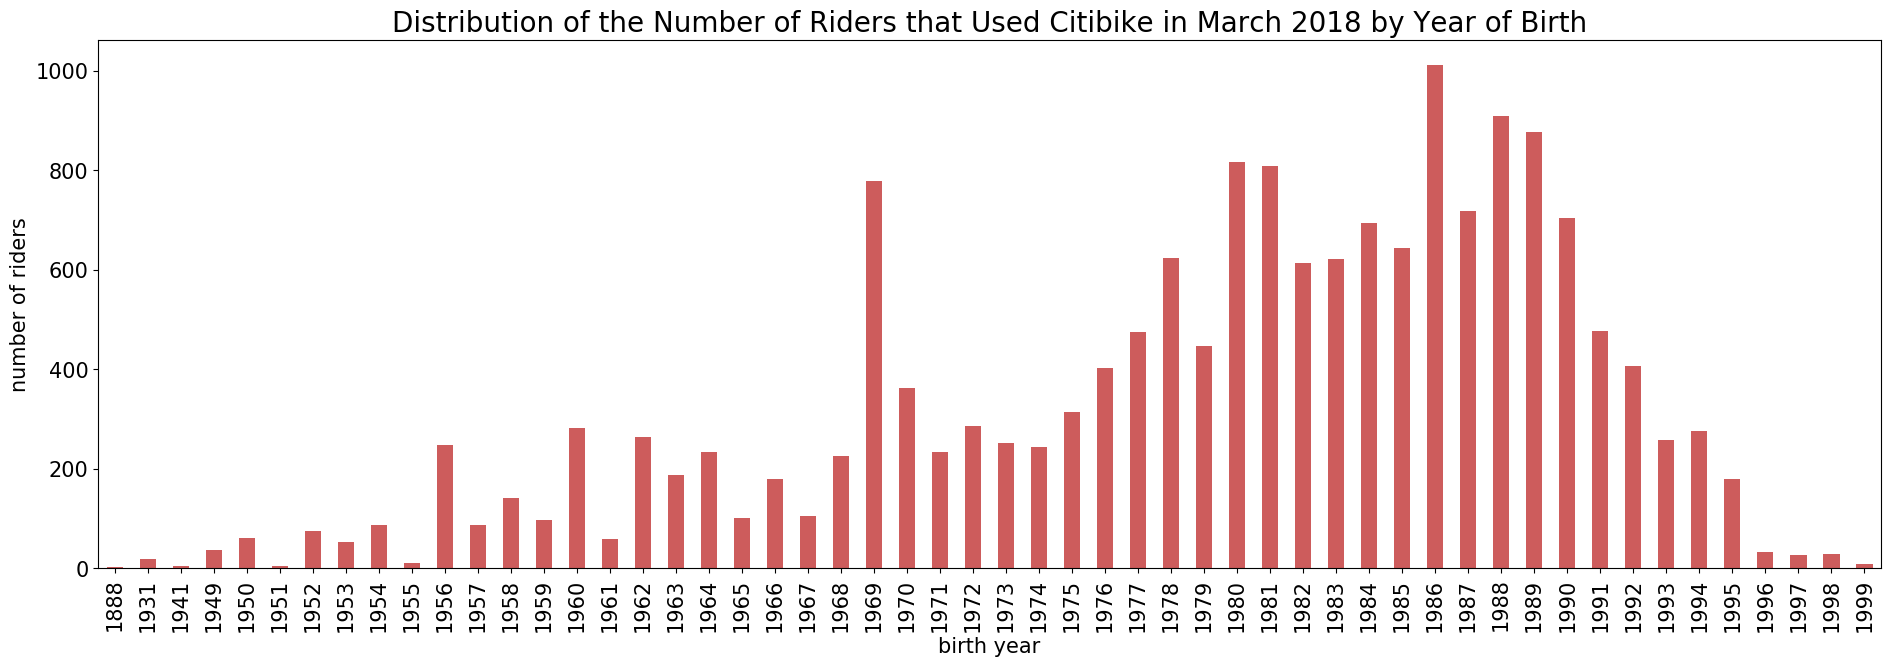

In [11]:
fig1 = plt.figure(figsize=(23,7), dpi=100)
ax1 = ((ct_dob['birth year'].groupby([ct_dob['birth year']]).count())).plot(kind="bar", color='IndianRed')
ax1.set_ylabel('number of riders', fontsize=15)
ax1.set_xlabel('birth year', fontsize=15)
ax1.set_title('Distribution of the Number of Riders that Used Citibike in March 2018 by Year of Birth', fontsize=20)
plt.tick_params(labelsize=15)

**Figure 1:** This is the distribution of the number of people that used Citi Bike in March 2018 by year of birth. We notice that the distribution is skewed to the right. Therefore we can conclude that in that month people of smaller ages used Citi Bike more.

## A closer look at the distribution of two age groups Generation X and Millennials

In [12]:
# G1 > Gen X
ct_dob[(ct_dob['birth year'] >= 1965) & (ct_dob['birth year'] <= 1980)].describe()

,birth year
count,5852.000000
mean,1974.145933
std,4.499708
min,1965.000000
25%,1970.000000
50%,1975.000000
75%,1978.000000
max,1980.000000


In [13]:
# G2 > Millennials
ct_dob[(ct_dob['birth year'] >= 1981) & (ct_dob['birth year'] <= 1996)].describe()

,birth year
count,9237.000000
mean,1986.907762
std,3.747461
min,1981.000000
25%,1984.000000
50%,1987.000000
75%,1990.000000
max,1996.000000


In [14]:
# Subsetting the main dataframe into two groups
G1 = ct_dob[(ct_dob['birth year'] >= 1965) & (ct_dob['birth year'] <= 1980)].reset_index()
G2 = ct_dob[(ct_dob['birth year'] >= 1981) & (ct_dob['birth year'] <= 1996)].reset_index()

In [15]:
G1.drop('index', axis=1, inplace=True)
G2.drop('index', axis=1, inplace=True)

In [16]:
G1.head()

,birth year
0,1966
1,1975
2,1970
3,1979
4,1974


In [17]:
G2.head()

,birth year
0,1981
1,1984
2,1986
3,1983
4,1987


In [18]:
# description of group 1
G1['birth year'].groupby(G1['birth year']).count().describe()

count     16.000000
mean     365.750000
std      216.883225
min      102.000000
25%      232.000000
50%      301.000000
75%      455.000000
max      816.000000
Name: birth year, dtype: float64

In [19]:
# description of group 2
G2['birth year'].groupby([G2['birth year']]).count().describe()

count      16.000000
mean      577.312500
std       281.248815
min        32.000000
25%       374.250000
50%       633.500000
75%       741.500000
max      1012.000000
Name: birth year, dtype: float64

In [20]:
# settign variables to be plotted
G1_count = G1['birth year'].groupby(G1['birth year']).count()
G2_count = G2['birth year'].groupby([G2['birth year']]).count()
t_count = ct_dob['birth year'].groupby([ct_dob['birth year']]).count()

In [21]:
# counting for errors
G1_error = np.sqrt(G1_count)
G2_error = np.sqrt(G2_count)

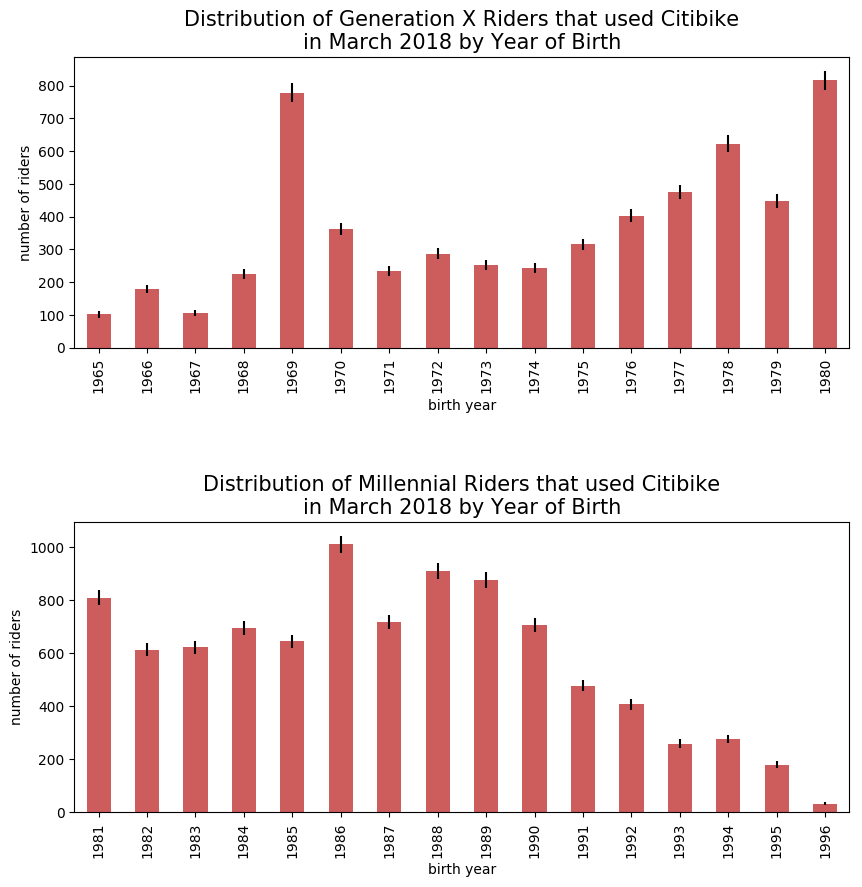

In [22]:
# plotting the two distributions of ride counts for group 1 and 2

fig2, ax = plt.subplots(2, figsize=(10,10), dpi=100)

G1_count.plot(kind="bar", color='IndianRed', ax=ax[0], yerr=[G1_error, G1_error])
ax[0].set_xlabel('birth year', fontsize=10)
ax[0].set_ylabel('number of riders', fontsize=10)
ax[0].set_title('Distribution of Generation X Riders that used Citi Bike\nin March 2018 by Year of Birth', fontsize=15)

G2_count.plot(kind="bar", color='IndianRed', ax=ax[1], yerr=[G2_error, G2_error])
ax[1].set_xlabel('birth year', fontsize=10)
ax[1].set_ylabel('number of riders', fontsize=10)
ax[1].set_title('Distribution of Millennial Riders that used Citi Bike\nin March 2018 by Year of Birth', fontsize=15)

fig2.subplots_adjust(hspace=0.6)

**Figure 2:** These are the absolute counts distributions of Gen X and Millennial riders respectively that used Citibike in March 2018 by year of birth. We notice that the number of riders differs between the two age groups, where it looks higher for Millennials that show a mean of 577 rides compared to a mean of 365 rides for Gen X. From here we want to do more analysis to see if this difference in numbers is significant.

## Normalizing the distributions

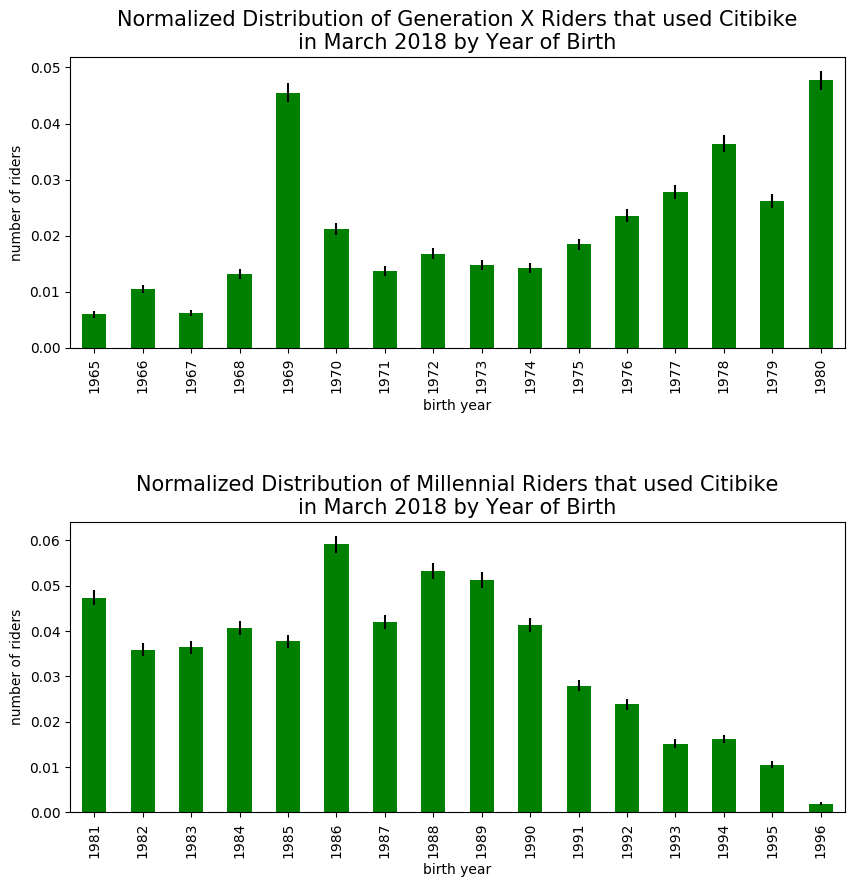

In [23]:
fig3, ax = plt.subplots(2, figsize=(10,10), dpi=100)
# G1 norm
(G1_count / t_count.sum()).plot(kind='bar', color='green', ax=ax[0],\
                                yerr=[(G1_error / t_count.sum()), (G1_error / t_count.sum())])
ax[0].set_ylabel('number of riders', fontsize=10)
ax[0].set_title('Normalized Distribution of Generation X Riders that used Citi Bike\nin March 2018 by Year of Birth', fontsize=15)

# G2 norm
(G2_count / t_count.sum()).plot(kind='bar', color='green', ax=ax[1],\
                                yerr=[(G2_error / t_count.sum()), (G2_error / t_count.sum())])
ax[1].set_ylabel('number of riders', fontsize=10)
ax[1].set_title('Normalized Distribution of Millennial Riders that used Citi Bike\nin March 2018 by Year of Birth', fontsize=15)

fig3.subplots_adjust(hspace=0.6)

**Figure 3:** These are the normalized distributions of Gen X and Millennial riders respectively that used Citibike in March 2018 by year of birth.

## Set up the proportions

In [24]:
# sample size of group one > Gen X
n1 = G1_count.sum()
# sample size of group two > Millennials 
n2 = G2_count.sum()

# proportion of group one > Gen X
p1 = G1_count.sum() / t_count.sum()
#Proportion of group two > Millennials
p2 = G2_count.sum() / t_count.sum()

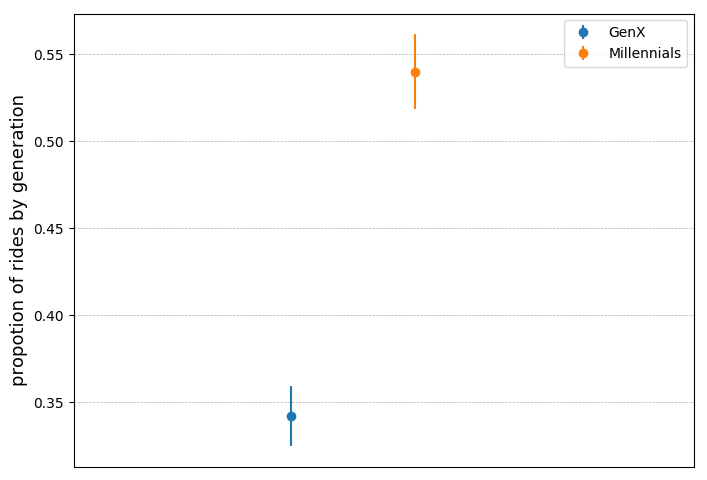

In [25]:
fig4, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.errorbar([0.2], [p1], yerr=[G1_error.sum() / t_count.sum()], fmt='o', label='GenX')
ax.errorbar([0.6], [p2], yerr=[G2_error.sum() / t_count.sum()], fmt='o', label='Millennials')

ax.set_xticks([])
ax.set_ylabel('propotion of rides by generation', fontsize=13)
plt.xlim(-0.5, 1.5)
plt.grid(linestyle='--', linewidth='.5')
plt.legend()

**Figure 4:** Proportion of Citi Bike rides for two generations GenX and Millennials in March 2016. We notice there is a difference in the proportions and conclude the need for further testing to check  if the difference is significant before we reject the null.

## Hypothesis Test: Difference Between Proportions:

We want to conduct a hypothesis test to determine if there is a significant difference between the two proportions.  
I will conduct a two-tailed **two-proportion z-test**.  
Reference: https://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

pooled sample proportion:   p = $\frac{p_0 n_0  + p_1 n1}{n_0 + n_1}$

sdanrdard error:  SE = $\sqrt{ \frac{ p(1 - p)} {n_0} + \frac{ p(1 - p)} {n_1} }$ 

z-statistic:  z = $\frac{p_1 - p_0} {SE}$

## Two-proportion Z-test

In [26]:
if p1 == p2:
    print ('The Null holds.')
else:
    print ('We must assess the statistical significance.')

We must assess the statistical significance.


In [27]:
# set lambda functions for p, SE and z
p = lambda p1, p2, n1, n2: (p1 * n1 + p2 *n2) / (n1 + n2)
SE = lambda p, n1, n2: np.sqrt(p * (1-p) * (1.0 / n1 + 1.0 / n2))
z = lambda p1, p2, SE : (p1 -p2) / SE

# calculations
z = z(p1, p2, SE(p(p1, p2, n1, n2), n1, n2))
print ('z-statistic = {:.2f}'.format(z))

z-statistic = -23.75


**Since this is a two tailed test then the P-value is the propability of having a statistic less than -23.75 or greater than 23.75.  
We can use the z table or an online calculator to get the P-value. Noticing that the z-statistic that we got is very big we know that the P-value is almost zero which is definitely leass than our significance level $\alpha$=0.05**

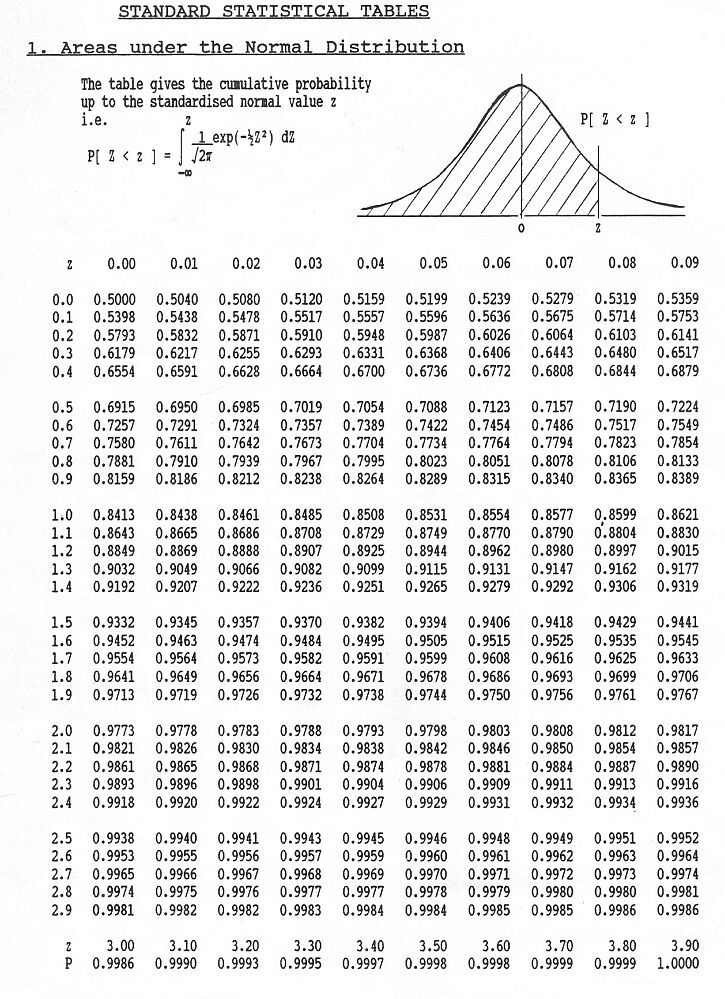

In [28]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

In [29]:
# actual z-score: z = -23.75 is not found in the z-table
# for the sake of testing we chose a very high z-score 
# approximate z-score = 3.80 

P = 0.9999
p_value = (1 - P) * 2 # two-tailed test
alpha = 0.05

def result(p,a):
    print ('Is the p_value = ' + 
           '{0:.2f} smaller than the critical value = {1:.2f}?'.format(p,a))
    if p < a:
        print ('YES!')
    else: 
        print ('NO!')
    
    print ('Then the Null hypothesis that the proportion of Generation X \
using Citi Bike is the same as that of Millennials {}'.format('is rejected.' if p < a  else 'holds') )

    
result(p_value, alpha)

Is the p_value = 0.00 smaller than the critical value = 0.05?
YES!
Then the Null hypothesis that the proportion of Generation X using CitiBike is the same as that of Millennials is rejected.


Obviously there is a significant difference in the pattern by which each generation uses Citi Bike.   
Millennials contribute to a higher proportion of the total rides taken in a month when compared to generation X.